In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


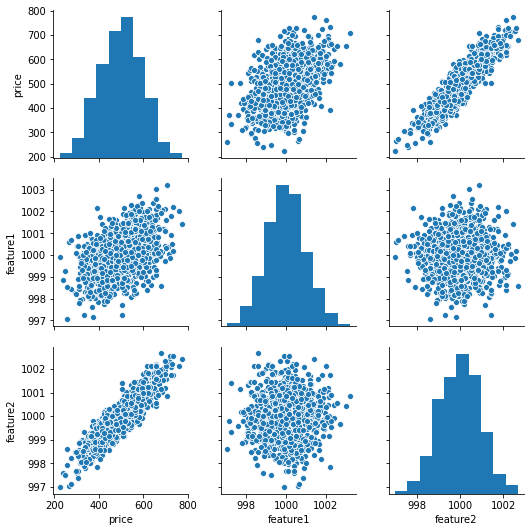

In [3]:
#feature2 has a better correlation with price based on the visualization
import seaborn as sns
sns.pairplot(df)

In [4]:
#.value attribute converts it to numpy array bcos keras can only work on numpy array
y = df['price'].values
X = df[['feature1', 'feature2']].values

In [5]:
#print(y)
#print(X)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#after splitting into train and test set, the dataset has to be scaled to avoid exploding gradient after the weight is updated from back propagation
#only the train set is fit, the test set is not fit to avoid the model seeing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
#test set is only transform
X_test = scaler.transform(X_test)

In [8]:
#model = sequential
#dense..this allows neurons to connect to all the neurons in the next layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#method1
model = Sequential([Dense(4, activation = 'relu'),
                   Dense(2, activation = 'relu'),
                   Dense(1)])

In [9]:
#method 2
#This has 4 layers
#the dense has 4 neuron
#the output has no activation function because it is regression task
model = Sequential()

model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(4, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss='mse')


In [10]:
#epochs tells it how many times it should run the data
#verbose should not be zero so it can show the result
model.fit(X_train, y_train, epochs = 250, verbose=1)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 4s 6ms/sample - loss: 256760.4348
Epoch 2/250
700/700 [==============================] - 0s 170us/sample - loss: 256675.3158
Epoch 3/250
700/700 [==============================] - 0s 150us/sample - loss: 256634.2816
Epoch 4/250
700/700 [==============================] - 0s 151us/sample - loss: 256588.5673
Epoch 5/250
700/700 [==============================] - 0s 144us/sample - loss: 256534.1398
Epoch 6/250
700/700 [==============================] - 0s 147us/sample - loss: 256471.8485
Epoch 7/250
700/700 [==============================] - 0s 146us/sample - loss: 256401.2684
Epoch 8/250
700/700 [==============================] - 0s 146us/sample - loss: 256322.7395
Epoch 9/250
700/700 [==============================] - 0s 156us/sample - loss: 256236.0091
Epoch 10/250
700/700 [==============================] - 0s 143us/sample - loss: 256139.4037
Epoch 11/250
700/700 [==============================] - 0s 166us/sampl

700/700 [==============================] - 0s 153us/sample - loss: 142946.7659
Epoch 88/250
700/700 [==============================] - 0s 137us/sample - loss: 139280.8242
Epoch 89/250
700/700 [==============================] - 0s 140us/sample - loss: 135550.1802
Epoch 90/250
700/700 [==============================] - 0s 134us/sample - loss: 131774.9675
Epoch 91/250
700/700 [==============================] - 0s 141us/sample - loss: 127989.8817
Epoch 92/250
700/700 [==============================] - 0s 131us/sample - loss: 124150.3797
Epoch 93/250
700/700 [==============================] - 0s 140us/sample - loss: 120261.3452
Epoch 94/250
700/700 [==============================] - 0s 136us/sample - loss: 116329.1038
Epoch 95/250
700/700 [==============================] - 0s 150us/sample - loss: 112352.4707
Epoch 96/250
700/700 [==============================] - 0s 136us/sample - loss: 108364.1729
Epoch 97/250
700/700 [==============================] - 0s 137us/sample - loss: 104351.7071
E

700/700 [==============================] - 0s 144us/sample - loss: 1132.2875
Epoch 175/250
700/700 [==============================] - 0s 136us/sample - loss: 1115.6370
Epoch 176/250
700/700 [==============================] - 0s 139us/sample - loss: 1096.9383
Epoch 177/250
700/700 [==============================] - 0s 136us/sample - loss: 1082.2805
Epoch 178/250
700/700 [==============================] - 0s 135us/sample - loss: 1065.7572
Epoch 179/250
700/700 [==============================] - 0s 130us/sample - loss: 1047.4880
Epoch 180/250
700/700 [==============================] - 0s 137us/sample - loss: 1030.7028
Epoch 181/250
700/700 [==============================] - 0s 139us/sample - loss: 1014.4554
Epoch 182/250
700/700 [==============================] - 0s 141us/sample - loss: 998.3077
Epoch 183/250
700/700 [==============================] - 0s 134us/sample - loss: 983.4818
Epoch 184/250
700/700 [==============================] - 0s 144us/sample - loss: 968.4641
Epoch 185/250
70

In [11]:
model.history.history

{'loss': [256760.4348214286,
  256675.31580357143,
  256634.28160714285,
  256588.56732142856,
  256534.13982142857,
  256471.84848214284,
  256401.26839285714,
  256322.73946428573,
  256236.00910714286,
  256139.40375,
  256033.20714285714,
  255916.47651785714,
  255788.48544642856,
  255647.90982142856,
  255493.83830357142,
  255325.62410714285,
  255141.75857142857,
  254940.333125,
  254723.39589285714,
  254488.66794642858,
  254235.16089285715,
  253961.50732142857,
  253665.85294642858,
  253350.07705357144,
  253009.87776785714,
  252646.2473214286,
  252257.78776785714,
  251844.2988392857,
  251402.94526785714,
  250928.56839285715,
  250431.06214285715,
  249900.3224107143,
  249338.00526785714,
  248741.80375,
  248115.034375,
  247449.5682142857,
  246749.41830357144,
  246014.76928571428,
  245238.16330357143,
  244425.934375,
  243563.4558035714,
  242658.58142857143,
  241716.25089285715,
  240734.55169642856,
  239700.0944642857,
  238618.41133928573,
  237490.05339

In [12]:
#create a dataframe to visulise the loss and plot it to visualize
losses = pd.DataFrame(model.history.history)
losses

,loss
0,256760.434821
1,256675.315804
2,256634.281607
3,256588.567321
4,256534.139821
...,...
245,188.180866
246,180.395543
247,172.716582
248,165.231829


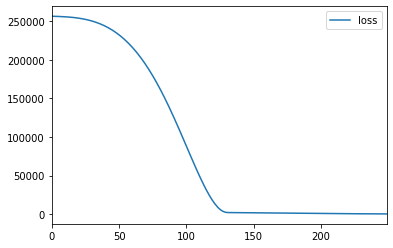

In [13]:
losses.plot()

In [14]:
#model.evaluate(X_test, y_test, verbose = 0)

In [15]:
#model.evaluate(X_train, y_train, verbose = 0)

In [16]:
test_predictions= model.predict(X_test)

In [17]:
#check true target values
true_pred_df = pd.DataFrame(y_test, columns =['Test True Y'])
true_pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [18]:
test_predictions = pd.Series(test_predictions.reshape(300,))
pred_df = pd.concat([true_pred_df, test_predictions], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']
print(pred_df.head())


   Test True Y  Model Predictions
0   402.296319         418.123840
1   624.156198         610.860779
2   582.455066         584.089050
3   578.588606         563.343567
4   371.224104         379.758423


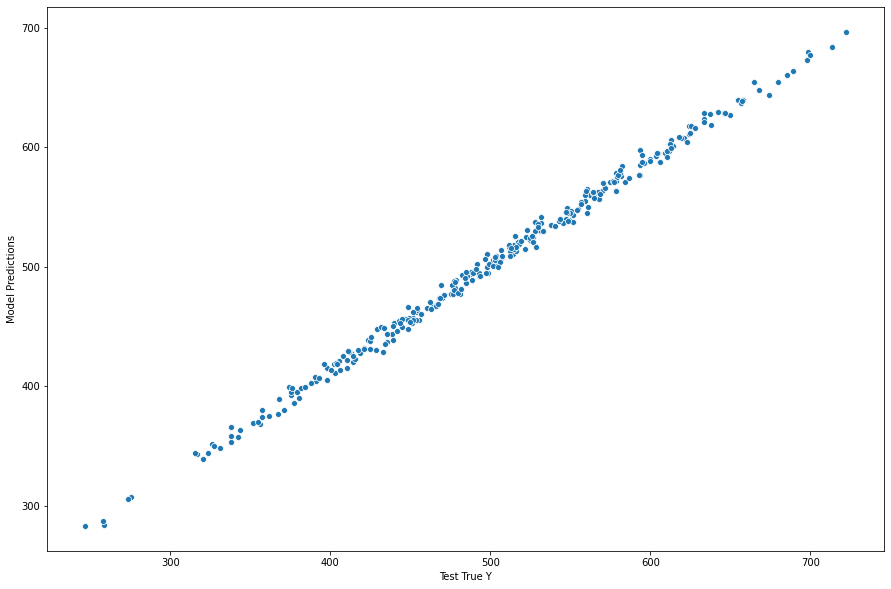

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Test True Y', y= 'Model Predictions', data = pred_df)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
print(mean_squared_error(test_predictions, y_test))

148.3428756407412


In [22]:
print(mean_absolute_error(test_predictions, y_test))

9.656309798013709


In [23]:
print(np.sqrt(mean_squared_error(test_predictions, y_test)))

12.179609010175211


In [24]:
#saving a model

from tensorflow.keras.models import load_model

In [25]:
model.save('my_gem_model.h5')

In [26]:
later_model = load_model('my_gem_model.h5')